# Instalação de dependências e conexão com postgres

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [797]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas
#!pip install --user matplotlib

## Importando bibliotecas

In [798]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

## Usando psycopg2 para configurar conexão

In [799]:
conn = psycopg2.connect(host = "tuffi.db.elephantsql.com", database = "glnbjapw", user = "glnbjapw", password = "bddMVxcVwSQFT5QMIXS8bHyvjNCIUh5i")
cur = conn.cursor()

# Preparação do banco de dados

## Drops

### Usuário

In [800]:
cur.execute("DROP TABLE IF EXISTS usuario CASCADE")
conn.commit()

### Auxiliado

In [801]:
cur.execute("DROP TABLE IF EXISTS auxiliado CASCADE")
conn.commit()

### Profissional jurídico

In [802]:
cur.execute("DROP TABLE IF EXISTS profissional_juridico CASCADE")
conn.commit()

### Solicitação

In [803]:
cur.execute("DROP TABLE IF EXISTS solicitacao CASCADE")
conn.commit()

### Mensagem

In [804]:
cur.execute("DROP TABLE IF EXISTS mensagem CASCADE")
conn.commit()

### Visão geral

In [805]:
cur.execute("DROP VIEW IF EXISTS visao_geral CASCADE")
conn.commit()

## Creates

### Usuário

In [806]:
cur.execute("""
CREATE TABLE usuario (
  nome varchar(60),
  cpf bigint PRIMARY KEY,
  senha varchar(30)
);
""")

conn.commit()

### Auxiliado

In [807]:
cur.execute("""
CREATE TABLE auxiliado (
  cpf_usuario bigint REFERENCES usuario(cpf) PRIMARY KEY,
  ctps bigint,
  rg bigint,
  numero_telefone int,
  data_nascimento date
);
""")

conn.commit()

### Profissional jurídico

In [808]:
cur.execute("""
CREATE TABLE profissional_juridico (
  cpf_usuario bigint REFERENCES usuario(cpf) PRIMARY KEY,
  numero_oab bigint
);
""")

conn.commit()

### Solicitação

In [809]:
cur.execute("""
CREATE TABLE solicitacao (
  codigo serial PRIMARY KEY,
  estado_atual varchar(100),
  data_abertura date,
  cpf_auxiliado bigint REFERENCES auxiliado(cpf_usuario),
  cpf_profissional bigint REFERENCES profissional_juridico(cpf_usuario)
);
""")

conn.commit()

### Mensagem

In [810]:
cur.execute("""
CREATE TABLE mensagem (
  codigo serial PRIMARY KEY,
  codigo_solicitacao serial REFERENCES solicitacao(codigo),
  texto varchar(255),
  data_envio timestamp,
  cpf_remetente bigint REFERENCES usuario(cpf)
);
""")

conn.commit()

### Visão geral

In [811]:
cur.execute("""
CREATE VIEW visao_geral AS (
	SELECT
		usuario.nome AS usuario_nome,
		usuario.cpf AS usuario_cpf,
		usuario.senha AS usuario_senha,
		auxiliado.cpf_usuario AS auxiliado_cpf_usuario,
		auxiliado.ctps AS auxiliado_ctps,
		auxiliado.rg AS auxiliado_rg,
		auxiliado.numero_telefone AS auxiliado_numero_telefone,
		auxiliado.data_nascimento AS auxiliado_data_nascimento,
		profissional_juridico.cpf_usuario AS profissional_cpf_usuario,
		profissional_juridico.numero_oab AS profissional_numero_oab,
		solicitacao.codigo AS solicitacao_codigo,
		solicitacao.estado_atual AS solicitacao_estado_atual,
		solicitacao.data_abertura AS solicitacao_data_abertura,
		solicitacao.cpf_auxiliado AS solicitacao_cpf_auxiliado,
		solicitacao.cpf_profissional AS solicitacao_cpf_profissional,
		mensagem.codigo AS mensagem_codigo,
		mensagem.codigo_solicitacao AS mensagem_codigo_solicitacao,
		mensagem.texto AS mensagem_texto,
		mensagem.data_envio AS mensagem_data_envio,
		mensagem.cpf_remetente AS mensagem_cpf_remetente
		FROM usuario
		RIGHT JOIN auxiliado ON auxiliado.cpf_usuario = usuario.cpf
		LEFT JOIN profissional_juridico ON profissional_juridico.cpf_usuario = auxiliado.cpf_usuario
		LEFT JOIN solicitacao ON solicitacao.cpf_auxiliado = auxiliado.cpf_usuario
		LEFT JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
		WHERE mensagem.cpf_remetente = solicitacao.cpf_auxiliado OR mensagem.codigo IS NULL
) UNION ALL (
	SELECT
		usuario.nome AS usuario_nome,
		usuario.cpf AS usuario_cpf,
		usuario.senha AS usuario_senha,
		auxiliado.cpf_usuario AS auxiliado_cpf_usuario,
		auxiliado.ctps AS auxiliado_ctps,
		auxiliado.rg AS auxiliado_rg,
		auxiliado.numero_telefone AS auxiliado_numero_telefone,
		auxiliado.data_nascimento AS auxiliado_data_nascimento,
		profissional_juridico.cpf_usuario AS profissional_cpf_usuario,
		profissional_juridico.numero_oab AS profissional_numero_oab,
		solicitacao.codigo AS solicitacao_codigo,
		solicitacao.estado_atual AS solicitacao_estado_atual,
		solicitacao.data_abertura AS solicitacao_data_abertura,
		solicitacao.cpf_auxiliado AS solicitacao_cpf_auxiliado,
		solicitacao.cpf_profissional AS solicitacao_cpf_profissional,
		mensagem.codigo AS mensagem_codigo,
		mensagem.codigo_solicitacao AS mensagem_codigo_solicitacao,
		mensagem.texto AS mensagem_texto,
		mensagem.data_envio AS mensagem_data_envio,
		mensagem.cpf_remetente AS mensagem_cpf_remetente
		FROM usuario
		LEFT JOIN auxiliado ON auxiliado.cpf_usuario = usuario.cpf
		RIGHT JOIN profissional_juridico ON profissional_juridico.cpf_usuario = usuario.cpf
		LEFT JOIN solicitacao ON solicitacao.cpf_profissional = profissional_juridico.cpf_usuario
		LEFT JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
		WHERE mensagem.cpf_remetente != solicitacao.cpf_auxiliado OR mensagem.codigo IS NULL
) ORDER BY usuario_cpf;
""")

conn.commit()

## Inserts

### Usuário

In [812]:
cur.execute("""
INSERT INTO usuario (
	nome,
	cpf,
	senha
) VALUES (
	'Cleiton Rasta',
	1556785,
	'rasta'
), (
	'Emanuel',
	342353,
	'1557'
), (
	'Alexander',
	171171,
	'preguicoso'
), (
	'Juscileide',
	11557,
	'777'
), (
	'Maria',
	12312,
	'lola'
), (
	'Marlon',
	45324,
	'edge'
), (
	'Lucas',
	11223,
	'tchola'
), (
	'Ruth',
	28347,
	'dri'
), (
	'Bruno',
	48903,
	'ninn'
), (
	'Rafaela',
	2553209,
	'neobeats'
), (
	'Leonardo',
	78923,
	'jack'
), (
	'Paloma',
	93483,
	'99037'
), (
	'Daniela',
	93846,
	'hbby'
), (
	'May',
	94582,
	'889236'
), (
	'Eleonor',
	155000,
	'eleonor999'
), (
	'George',
	67384,
	'hhype'
), (
	'Larissa',
	78374,
	'uleka'
);
""")

conn.commit()

### Auxiliado

In [813]:
cur.execute("""
INSERT INTO auxiliado (
	cpf_usuario,
	ctps,
	rg,
	numero_telefone,
	data_nascimento
) VALUES (
	342353,
	1328946,
	1245879,
	27999787,
	'1978-09-23'
), (
	11557,
	2454789,
	8530267,
	27995975,
	'1988-11-01'
), (
	45324,
	3578549,
	8752566,
	21975266,
	'1999-08-30'
), (
	11223,
	4587845,
	2458789,
	27936565,
	'1998-02-19'
), (
	48903,
	1231445,
	4535636,
	31975223,
	'1990-05-30'
), (
	78923,
	3571549,
	1113856,
	78248768,
	'1991-08-30'
), (
	93483,
	3570009,
	1752560,
	78224572,
	'1991-08-30'
), (
	94582,
	3578245,
	0752566,
	31435266,
	'1991-08-30'
), (
	155000,
	4987589,
	4382795,
	78984739,
	'1978-01-23'
), (
	78374,
	3578111,
	8002566,
	21921266,
	'1991-08-30'
);
""")

conn.commit()

### Profissional jurídico

In [814]:
cur.execute("""
INSERT INTO profissional_juridico (
	cpf_usuario,
	numero_oab
) values (
	1556785,
	5667
), (
	171171,
	8492
), (
	12312,
	6534
), (
	28347,
	3456
), (
	2553209,
	3790
), (
	93846,
	9874
), (
	67384,
	4859
);
""")

conn.commit()

### Solicitação

In [815]:
cur.execute("""
INSERT INTO solicitacao (
	estado_atual,
	data_abertura,
	cpf_auxiliado,
	cpf_profissional
) VALUES (
	'ABERTO',
	'2020-03-01',
	342353,
	1556785
), (
	'ABERTO',
	'2020-03-02',
	11223,
	12312
), (
	'FECHADO',
	'2020-03-03',
	11557,
	1556785
), (
	'FECHADO',
	'2020-04-12',
	93483,
	67384
), (
	'FECHADO',
	'2020-04-15',
	94582,
	28347
), (
	'ABERTO',
	'2020-05-04',
	48903,
	28347
), (
	'FECHADO',
	'2020-06-15',
	78923,
	67384
), (
	'FECHADO',
	'2020-06-17',
	78374,
	93846
), (
	'ABERTO',
	'2020-07-11',
	78374,
	NULL
);
""")

conn.commit()

### Mensagem

In [816]:
cur.execute("""
INSERT INTO mensagem (
	codigo_solicitacao,
	texto,
	data_envio,
	cpf_remetente
) VALUES (
	1,
	'Tenho dívidas pendentes como cheque especial e outros débitos.',
	'2020-03-01 09:31:23',
	342353
), (
	1,
	'Esses débitos serão automaticamente cobrados quando o auxílio for depositado?',
	'2020-03-01 09:31:45',
	342353
), (
	1,
	'Não.',
	'2020-03-01 11:49:49',
	1556785
), (
	1,
	'O valor do auxílio não será usado para amortizar débitos anteriores.',
	'2020-03-01 11:50:06',
	1556785
), (
	1,
	'Ele ficará blindado em sua conta.',
	'2020-03-01 11:50:34',
	1556785
), (
	1,
	'Trata-se de um auxílio emergencial para ajudar no sustento das famílias nesse período de excepcionalidade',
	'2020-03-01 11:51:09',
	1556785
), (
	2,
	'Recebo pensão por morte do INSS. Não tenho outra renda, sou diarista e pago aluguel.',
	'2020-03-02 15:27:20',
	11223
), (
	2,
	'Tenho direito ao benefício do auxílio emergencial?',
	'2020-03-02 15:27:36',
	11223
), (
	2,
	'Não.',
	'2020-03-02 10:19:58',
	12312
), (
	2,
	'Os titulares de benefício da Previdência Social não podem receber o auxílio emergencial.',
	'2020-03-02 10:20:18',
	12312
), (
	2,
	'Mesmo que preencham todas as outras condições para isso.',
	'2020-03-02 10:20:32',
	12312
), (
	3,
	'Meu marido é aposentado, mas eu não sou.',
	'2020-03-03 21:18:25',
	11557
), (
	3,
	'Estou desempregada.',
	'2020-03-03 21:18:36',
	11557
), (
	3,
	'Posso pedir o auxílio emergencial?',
	'2020-03-03 21:18:54',
	11557
), (
	3,
	'Sim, se cumprir as condições.',
	'2020-03-04 09:11:02',
	1556785
), (
	4,
	'Fui tentar o auxílio e sigo todos os pré requisitos, mas da erro na RAIS.',
	'2020-04-12 09:11:02',
	93483
), (
	4,
	'Faz quanto tempo desde o último contrato?',
	'2020-04-12 10:12:00',
	67384	
), (
	4,
	'Dois meses antes do auxílio, era servidor público.',
	'2020-04-12 10:15:02',
	93483
), (
	4,
	'Pela lei a RAIS deve ser atualizada anualmente. Tente entrar em contato com a empresa ou órgão que foi contratado.',
	'2020-04-12 10:22:00',
	67384	
), (
	4,
	'Liguei para o setor de rh e não consegui resolver.',
	'2020-04-12 15:11:02',
	93483
), (
	4,
	'Nesse caso um processo será necessário.',
	'2020-04-12 15:22:00',
	67384	
), (
	4,
	'Como devo proceder nesse período de pandemia?',
	'2020-04-12 15:31:02',
	93483
), (
	4,
	'Entre em contato com a defensoria pública, através do email def@estado.com. E mande as cópias de seus documentos.',
	'2020-04-12 15:42:00',
	67384	
), (
	4,
	'Entrarei em contato.',
	'2020-04-12 16:00:02',
	93483
), (
	5,
	'Não entendo, me encaixo em todos os requisitos para o auxílio e o mesmo foi negado.',
	'2020-04-15 11:11:02',
	94582
), (
	5,
	'Qual a renda familiar bruta?',
	'2020-04-15 11:21:04',
	28347
), (
	5,
	'Como assim?',
	'2020-04-15 11:25:11',
	94582
), (
	5,
	'Somando a renda de todos que trabalham de carteira assinada ou recebe algum auxílio.',
	'2020-04-15 11:29:04',
	28347
), (
	5,
	'Só minha esposa trabalha, a renda é de R$3,500.',
	'2020-04-15 11:33:14',
	94582
), (
	5,
	'No seu caso a renda mensal é maior que a necessária para o auxílio.',
	'2020-04-15 11:35:04',
	28347
), (
	5,
	'Ok, obrigado.',
	'2020-04-15 11:41:02',
	94582
), (
	6,
	'Sofri um acidente mas a carteira não era assinada.',
	'2020-05-04 08:15:02',
	48903
), (
	6,
	'E qual foi a posição da empresa?',
	'2020-05-04 11:00:33',
	28347
), (
	6,
	'Não estão me dando uma resposta direta e estou sem receber.',
	'2020-05-04 11:15:02',
	48903
), (
	6,
	'Tem como comprovar que estava trabalhando nesse período?',
	'2020-05-04 11:20:33',
	28347
), (
	6,
	'Tenho alguns contracheques assinados, e algumas conversas com o chefe salvas.',
	'2020-05-04 11:35:02',
	48903
), (
	6,
	'A senhora pode entrar com um processo contra e empresa, guarde essas provas pois serão necessárias e entre em contato com a defensoria pública.',
	'2020-05-04 12:00:33',
	28347
), (
	6,
	'Ok, Obrigada.',
	'2020-05-04 12:15:02',
	48903
), (
	7,
	'Meu contrato acabou e percebi que não recebi meu fgts, é normal?',
	'2020-06-15 11:41:02',
	78923
), (
	7,
	'Não, entre em contato com a empresa. Se não chegar a um acordo denuncie.',
	'2020-06-15 11:51:02',
	67384
), (
	7,
	'Tem mais de 5 meses que sai, ainda consigo?',
	'2020-06-15 11:55:02',
	78923
), (
	7,
	'Pode ser solicitado mesmo até um ano depois do desligamento.',
	'2020-06-15 11:57:02',
	67384
), (
	7,
	'Obrigado',
	'2020-06-15 11:59:15',
	78923
), (
	8,
	'Fui aprovado mais não recebi o auxilio. Como proceder?',
	'2020-06-17 15:06:01',
	78374
), (
	8,
	'A caixa está liberando em lotes, se foi por agora é só aguardar que já deve cair no aplicativo da Caixa.',
	'2020-06-17 15:41:02',
	93846
), (
	8,
	'Ok',
	'2020-06-17 16:02:11',
	78374
), (
	9,
	'Saiu outro lote e ainda não recebi, o que faço?',
	'2020-07-11 15:16:01',
	78374
);
""")

conn.commit()

# 4.3. Tabela de dados do sistema (visão geral)


In [817]:
pd.read_sql_query("SELECT * FROM visao_geral", conn)

,usuario_nome,usuario_cpf,usuario_senha,auxiliado_cpf_usuario,auxiliado_ctps,auxiliado_rg,auxiliado_numero_telefone,auxiliado_data_nascimento,profissional_cpf_usuario,profissional_numero_oab,solicitacao_codigo,solicitacao_estado_atual,solicitacao_data_abertura,solicitacao_cpf_auxiliado,solicitacao_cpf_profissional,mensagem_codigo,mensagem_codigo_solicitacao,mensagem_texto,mensagem_data_envio,mensagem_cpf_remetente
0,Lucas,11223,tchola,11223.0,4587845.0,2458789.0,27936565.0,1998-02-19,NaN,NaN,2.0,ABERTO,2020-03-02,11223.0,12312.0,8.0,2.0,Tenho direito ao benefício do auxílio emergenc...,2020-03-02 15:27:36,11223.0
1,Lucas,11223,tchola,11223.0,4587845.0,2458789.0,27936565.0,1998-02-19,NaN,NaN,2.0,ABERTO,2020-03-02,11223.0,12312.0,7.0,2.0,Recebo pensão por morte do INSS. Não tenho out...,2020-03-02 15:27:20,11223.0
2,Juscileide,11557,777,11557.0,2454789.0,8530267.0,27995975.0,1988-11-01,NaN,NaN,3.0,FECHADO,2020-03-03,11557.0,1556785.0,13.0,3.0,Estou desempregada.,2020-03-03 21:18:36,11557.0
3,Juscileide,11557,777,11557.0,2454789.0,8530267.0,27995975.0,1988-11-01,NaN,NaN,3.0,FECHADO,2020-03-03,11557.0,1556785.0,12.0,3.0,"Meu marido é aposentado, mas eu não sou.",2020-03-03 21:18:25,11557.0
4,Juscileide,11557,777,11557.0,2454789.0,8530267.0,27995975.0,1988-11-01,NaN,NaN,3.0,FECHADO,2020-03-03,11557.0,1556785.0,14.0,3.0,Posso pedir o auxílio emergencial?,2020-03-03 21:18:54,11557.0
5,Maria,12312,lola,NaN,NaN,NaN,NaN,None,12312.0,6534.0,2.0,ABERTO,2020-03-02,11223.0,12312.0,10.0,2.0,Os titulares de benefício da Previdência Socia...,2020-03-02 10:20:18,12312.0
6,Maria,12312,lola,NaN,NaN,NaN,NaN,None,12312.0,6534.0,2.0,ABERTO,2020-03-02,11223.0,12312.0,11.0,2.0,Mesmo que preencham todas as outras condições ...,2020-03-02 10:20:32,12312.0
7,Maria,12312,lola,NaN,NaN,NaN,NaN,None,12312.0,6534.0,2.0,ABERTO,2020-03-02,11223.0,12312.0,9.0,2.0,Não.,2020-03-02 10:19:58,12312.0
8,Ruth,28347,dri,NaN,NaN,NaN,NaN,None,28347.0,3456.0,6.0,ABERTO,2020-05-04,48903.0,28347.0,33.0,6.0,E qual foi a posição da empresa?,2020-05-04 11:00:33,28347.0
9,Ruth,28347,dri,NaN,NaN,NaN,NaN,None,28347.0,3456.0,6.0,ABERTO,2020-05-04,48903.0,28347.0,35.0,6.0,Tem como comprovar que estava trabalhando ness...,2020-05-04 11:20:33,28347.0


# 9. Tabelas e principais consultas

## 9.1. Consultas das tabelas com todos os dados inseridos

### Usuário

In [818]:
pd.read_sql_query("SELECT * FROM usuario", conn)

,nome,cpf,senha
0,Cleiton Rasta,1556785,rasta
1,Emanuel,342353,1557
2,Alexander,171171,preguicoso
3,Juscileide,11557,777
4,Maria,12312,lola
5,Marlon,45324,edge
6,Lucas,11223,tchola
7,Ruth,28347,dri
8,Bruno,48903,ninn
9,Rafaela,2553209,neobeats


### Profissional jurídico

In [819]:
pd.read_sql_query("SELECT * FROM profissional_juridico", conn)

,cpf_usuario,numero_oab
0,1556785,5667
1,171171,8492
2,12312,6534
3,28347,3456
4,2553209,3790
5,93846,9874
6,67384,4859


### Auxiliado

In [820]:
pd.read_sql_query("SELECT * FROM auxiliado", conn)

,cpf_usuario,ctps,rg,numero_telefone,data_nascimento
0,342353,1328946,1245879,27999787,1978-09-23
1,11557,2454789,8530267,27995975,1988-11-01
2,45324,3578549,8752566,21975266,1999-08-30
3,11223,4587845,2458789,27936565,1998-02-19
4,48903,1231445,4535636,31975223,1990-05-30
5,78923,3571549,1113856,78248768,1991-08-30
6,93483,3570009,1752560,78224572,1991-08-30
7,94582,3578245,752566,31435266,1991-08-30
8,155000,4987589,4382795,78984739,1978-01-23
9,78374,3578111,8002566,21921266,1991-08-30


### Solicitação

In [821]:
pd.read_sql_query("SELECT * FROM solicitacao", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,1,ABERTO,2020-03-01,342353,1556785.0
1,2,ABERTO,2020-03-02,11223,12312.0
2,3,FECHADO,2020-03-03,11557,1556785.0
3,4,FECHADO,2020-04-12,93483,67384.0
4,5,FECHADO,2020-04-15,94582,28347.0
5,6,ABERTO,2020-05-04,48903,28347.0
6,7,FECHADO,2020-06-15,78923,67384.0
7,8,FECHADO,2020-06-17,78374,93846.0
8,9,ABERTO,2020-07-11,78374,NaN


### Mensagem

In [822]:
pd.read_sql_query("SELECT * FROM mensagem", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,1,1,Tenho dívidas pendentes como cheque especial e...,2020-03-01 09:31:23,342353
1,2,1,Esses débitos serão automaticamente cobrados q...,2020-03-01 09:31:45,342353
2,3,1,Não.,2020-03-01 11:49:49,1556785
3,4,1,O valor do auxílio não será usado para amortiz...,2020-03-01 11:50:06,1556785
4,5,1,Ele ficará blindado em sua conta.,2020-03-01 11:50:34,1556785
5,6,1,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785
6,7,2,Recebo pensão por morte do INSS. Não tenho out...,2020-03-02 15:27:20,11223
7,8,2,Tenho direito ao benefício do auxílio emergenc...,2020-03-02 15:27:36,11223
8,9,2,Não.,2020-03-02 10:19:58,12312
9,10,2,Os titulares de benefício da Previdência Socia...,2020-03-02 10:20:18,12312


## 9.2. Consultas das tabelas com filtros where

In [823]:
pd.read_sql_query("SELECT * FROM usuario WHERE nome = 'Emanuel'", conn)

,nome,cpf,senha
0,Emanuel,342353,1557


In [824]:
pd.read_sql_query("SELECT * FROM profissional_juridico WHERE numero_oab = 5667", conn)

,cpf_usuario,numero_oab
0,1556785,5667


In [825]:
pd.read_sql_query("SELECT * FROM mensagem WHERE codigo < 9", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,1,1,Tenho dívidas pendentes como cheque especial e...,2020-03-01 09:31:23,342353
1,2,1,Esses débitos serão automaticamente cobrados q...,2020-03-01 09:31:45,342353
2,3,1,Não.,2020-03-01 11:49:49,1556785
3,4,1,O valor do auxílio não será usado para amortiz...,2020-03-01 11:50:06,1556785
4,5,1,Ele ficará blindado em sua conta.,2020-03-01 11:50:34,1556785
5,6,1,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785
6,7,2,Recebo pensão por morte do INSS. Não tenho out...,2020-03-02 15:27:20,11223
7,8,2,Tenho direito ao benefício do auxílio emergenc...,2020-03-02 15:27:36,11223


In [826]:
pd.read_sql_query("SELECT * FROM solicitacao WHERE estado_atual = 'FECHADO'", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,3,FECHADO,2020-03-03,11557,1556785
1,4,FECHADO,2020-04-12,93483,67384
2,5,FECHADO,2020-04-15,94582,28347
3,7,FECHADO,2020-06-15,78923,67384
4,8,FECHADO,2020-06-17,78374,93846


## 9.3. Consultas que usam operadores lógicos, aritméticos e tabelas ou campos renomeados

### Criar 5 consultas que envolvam os operadores lógicos AND, OR e Not

In [827]:
pd.read_sql_query("SELECT * FROM solicitacao WHERE estado_atual = 'ABERTO' AND data_abertura > '2020-03-02'", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,6,ABERTO,2020-05-04,48903,28347.0
1,9,ABERTO,2020-07-11,78374,NaN


In [828]:
pd.read_sql_query("SELECT * FROM solicitacao WHERE estado_atual = 'ABERTO' OR data_abertura > '2020-06-01'", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,1,ABERTO,2020-03-01,342353,1556785.0
1,2,ABERTO,2020-03-02,11223,12312.0
2,6,ABERTO,2020-05-04,48903,28347.0
3,7,FECHADO,2020-06-15,78923,67384.0
4,8,FECHADO,2020-06-17,78374,93846.0
5,9,ABERTO,2020-07-11,78374,NaN


In [829]:
pd.read_sql_query("SELECT * FROM mensagem WHERE NOT codigo_solicitacao = 1", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,7,2,Recebo pensão por morte do INSS. Não tenho out...,2020-03-02 15:27:20,11223
1,8,2,Tenho direito ao benefício do auxílio emergenc...,2020-03-02 15:27:36,11223
2,9,2,Não.,2020-03-02 10:19:58,12312
3,10,2,Os titulares de benefício da Previdência Socia...,2020-03-02 10:20:18,12312
4,11,2,Mesmo que preencham todas as outras condições ...,2020-03-02 10:20:32,12312
5,12,3,"Meu marido é aposentado, mas eu não sou.",2020-03-03 21:18:25,11557
6,13,3,Estou desempregada.,2020-03-03 21:18:36,11557
7,14,3,Posso pedir o auxílio emergencial?,2020-03-03 21:18:54,11557
8,15,3,"Sim, se cumprir as condições.",2020-03-04 09:11:02,1556785
9,16,4,Fui tentar o auxílio e sigo todos os pré requi...,2020-04-12 09:11:02,93483


In [830]:
pd.read_sql_query("SELECT * FROM mensagem WHERE codigo != 5 AND codigo_solicitacao != 2", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,1,1,Tenho dívidas pendentes como cheque especial e...,2020-03-01 09:31:23,342353
1,2,1,Esses débitos serão automaticamente cobrados q...,2020-03-01 09:31:45,342353
2,3,1,Não.,2020-03-01 11:49:49,1556785
3,4,1,O valor do auxílio não será usado para amortiz...,2020-03-01 11:50:06,1556785
4,6,1,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785
5,12,3,"Meu marido é aposentado, mas eu não sou.",2020-03-03 21:18:25,11557
6,13,3,Estou desempregada.,2020-03-03 21:18:36,11557
7,14,3,Posso pedir o auxílio emergencial?,2020-03-03 21:18:54,11557
8,15,3,"Sim, se cumprir as condições.",2020-03-04 09:11:02,1556785
9,16,4,Fui tentar o auxílio e sigo todos os pré requi...,2020-04-12 09:11:02,93483


In [831]:
pd.read_sql_query("SELECT * FROM usuario WHERE NOT nome = 'Lucas' AND cpf > 20000", conn)

,nome,cpf,senha
0,Cleiton Rasta,1556785,rasta
1,Emanuel,342353,1557
2,Alexander,171171,preguicoso
3,Marlon,45324,edge
4,Ruth,28347,dri
5,Bruno,48903,ninn
6,Rafaela,2553209,neobeats
7,Leonardo,78923,jack
8,Paloma,93483,99037
9,Daniela,93846,hbby


### Criar no mínimo 3 consultas com operadores aritméticos

In [832]:
pd.read_sql_query("SELECT codigo, (cpf_auxiliado - cpf_profissional) AS cpf_subtraido FROM solicitacao", conn)

,codigo,cpf_subtraido
0,1,-1214432.0
1,2,-1089.0
2,3,-1545228.0
3,4,26099.0
4,5,66235.0
5,6,20556.0
6,7,11539.0
7,8,-15472.0
8,9,NaN


In [833]:
pd.read_sql_query("SELECT data_envio, (cpf_remetente / codigo_solicitacao) AS cpf_div_cod_pr FROM mensagem", conn)

,data_envio,cpf_div_cod_pr
0,2020-03-01 09:31:23,342353
1,2020-03-01 09:31:45,342353
2,2020-03-01 11:49:49,1556785
3,2020-03-01 11:50:06,1556785
4,2020-03-01 11:50:34,1556785
5,2020-03-01 11:51:09,1556785
6,2020-03-02 15:27:20,5611
7,2020-03-02 15:27:36,5611
8,2020-03-02 10:19:58,6156
9,2020-03-02 10:20:18,6156


In [834]:
pd.read_sql_query("SELECT data_envio, (cpf_remetente * codigo) AS cpf_mult_cod FROM mensagem", conn)

,data_envio,cpf_mult_cod
0,2020-03-01 09:31:23,342353
1,2020-03-01 09:31:45,684706
2,2020-03-01 11:49:49,4670355
3,2020-03-01 11:50:06,6227140
4,2020-03-01 11:50:34,7783925
5,2020-03-01 11:51:09,9340710
6,2020-03-02 15:27:20,78561
7,2020-03-02 15:27:36,89784
8,2020-03-02 10:19:58,110808
9,2020-03-02 10:20:18,123120


### Criar no mínimo 3 consultas com operação de renomear nomes de campos ou tabelas

In [835]:
pd.read_sql_query("SELECT cpf_usuario AS cpf, numero_oab AS oab FROM profissional_juridico", conn)

,cpf,oab
0,1556785,5667
1,171171,8492
2,12312,6534
3,28347,3456
4,2553209,3790
5,93846,9874
6,67384,4859


In [836]:
pd.read_sql_query("SELECT cpf_usuario AS cpf, ctps AS carteira_de_trabalho FROM auxiliado", conn)

,cpf,carteira_de_trabalho
0,342353,1328946
1,11557,2454789
2,45324,3578549
3,11223,4587845
4,48903,1231445
5,78923,3571549
6,93483,3570009
7,94582,3578245
8,155000,4987589
9,78374,3578111


In [837]:
pd.read_sql_query("SELECT codigo_solicitacao AS cod_solicitacao, data_envio FROM mensagem", conn)

,cod_solicitacao,data_envio
0,1,2020-03-01 09:31:23
1,1,2020-03-01 09:31:45
2,1,2020-03-01 11:49:49
3,1,2020-03-01 11:50:06
4,1,2020-03-01 11:50:34
5,1,2020-03-01 11:51:09
6,2,2020-03-02 15:27:20
7,2,2020-03-02 15:27:36
8,2,2020-03-02 10:19:58
9,2,2020-03-02 10:20:18


## 9.4. Consultas que usam operadores like e datas

### Criar outras 5 consultas que envolvam like ou ilike

In [838]:
pd.read_sql_query("SELECT * FROM usuario WHERE nome ILIKE 'e%'", conn)

,nome,cpf,senha
0,Emanuel,342353,1557
1,Eleonor,155000,eleonor999


In [839]:
pd.read_sql_query("SELECT * FROM usuario WHERE nome ILIKE '%a'", conn)

,nome,cpf,senha
0,Cleiton Rasta,1556785,rasta
1,Maria,12312,lola
2,Rafaela,2553209,neobeats
3,Paloma,93483,99037
4,Daniela,93846,hbby
5,Larissa,78374,uleka


In [840]:
pd.read_sql_query("SELECT * FROM solicitacao WHERE estado_atual ILIKE 'a%'", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,1,ABERTO,2020-03-01,342353,1556785.0
1,2,ABERTO,2020-03-02,11223,12312.0
2,6,ABERTO,2020-05-04,48903,28347.0
3,9,ABERTO,2020-07-11,78374,NaN


In [841]:
pd.read_sql_query("SELECT * FROM mensagem WHERE texto ILIKE '%a_'", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,5,1,Ele ficará blindado em sua conta.,2020-03-01 11:50:34,1556785
1,13,3,Estou desempregada.,2020-03-03 21:18:36,11557
2,22,4,Como devo proceder nesse período de pandemia?,2020-04-12 15:31:02,93483
3,26,5,Qual a renda familiar bruta?,2020-04-15 11:21:04,28347
4,32,6,Sofri um acidente mas a carteira não era assin...,2020-05-04 08:15:02,48903
5,33,6,E qual foi a posição da empresa?,2020-05-04 11:00:33,28347
6,37,6,A senhora pode entrar com um processo contra e...,2020-05-04 12:00:33,28347
7,38,6,"Ok, Obrigada.",2020-05-04 12:15:02,48903
8,45,8,"A caixa está liberando em lotes, se foi por ag...",2020-06-17 15:41:02,93846


In [842]:
pd.read_sql_query("SELECT * FROM usuario WHERE senha LIKE '%7'", conn)

,nome,cpf,senha
0,Emanuel,342353,1557
1,Juscileide,11557,777
2,Paloma,93483,99037


### Criar uma consulta para cada tipo de função data apresentada

In [843]:
pd.read_sql_query("SELECT codigo, current_date - (data_envio) AS tempo_envio FROM mensagem", conn)

,codigo,tempo_envio
0,1,208 days 14:28:37
1,2,208 days 14:28:15
2,3,208 days 12:10:11
3,4,208 days 12:09:54
4,5,208 days 12:09:26
5,6,208 days 12:08:51
6,7,207 days 08:32:40
7,8,207 days 08:32:24
8,9,207 days 13:40:02
9,10,207 days 13:39:42


In [844]:
pd.read_sql_query("SELECT codigo, current_date - (data_abertura) AS tempo_abertura FROM solicitacao", conn)

,codigo,tempo_abertura
0,1,209
1,2,208
2,3,207
3,4,167
4,5,164
5,6,145
6,7,103
7,8,101
8,9,77


In [845]:
pd.read_sql_query("SELECT NOW(), current_date - (data_abertura) AS tempo_abertura FROM solicitacao", conn)

,now,tempo_abertura
0,2020-09-26 00:08:35.694543+00:00,209
1,2020-09-26 00:08:35.694543+00:00,208
2,2020-09-26 00:08:35.694543+00:00,207
3,2020-09-26 00:08:35.694543+00:00,167
4,2020-09-26 00:08:35.694543+00:00,164
5,2020-09-26 00:08:35.694543+00:00,145
6,2020-09-26 00:08:35.694543+00:00,103
7,2020-09-26 00:08:35.694543+00:00,101
8,2020-09-26 00:08:35.694543+00:00,77


In [846]:
pd.read_sql_query("SELECT cpf_usuario, DATE_PART('year', (AGE(current_date, data_nascimento))) AS idade FROM auxiliado", conn)

,cpf_usuario,idade
0,342353,42.0
1,11557,31.0
2,45324,21.0
3,11223,22.0
4,48903,30.0
5,78923,29.0
6,93483,29.0
7,94582,29.0
8,155000,42.0
9,78374,29.0


In [847]:
pd.read_sql_query("SELECT NOW(), data_envio FROM mensagem", conn)

,now,data_envio
0,2020-09-26 00:08:35.694543+00:00,2020-03-01 09:31:23
1,2020-09-26 00:08:35.694543+00:00,2020-03-01 09:31:45
2,2020-09-26 00:08:35.694543+00:00,2020-03-01 11:49:49
3,2020-09-26 00:08:35.694543+00:00,2020-03-01 11:50:06
4,2020-09-26 00:08:35.694543+00:00,2020-03-01 11:50:34
5,2020-09-26 00:08:35.694543+00:00,2020-03-01 11:51:09
6,2020-09-26 00:08:35.694543+00:00,2020-03-02 15:27:20
7,2020-09-26 00:08:35.694543+00:00,2020-03-02 15:27:36
8,2020-09-26 00:08:35.694543+00:00,2020-03-02 10:19:58
9,2020-09-26 00:08:35.694543+00:00,2020-03-02 10:20:18


In [848]:
pd.read_sql_query("SELECT cpf_usuario, EXTRACT('month' FROM data_nascimento) AS mes_aniversario FROM auxiliado", conn)

,cpf_usuario,mes_aniversario
0,342353,9.0
1,11557,11.0
2,45324,8.0
3,11223,2.0
4,48903,5.0
5,78923,8.0
6,93483,8.0
7,94582,8.0
8,155000,1.0
9,78374,8.0


In [849]:
pd.read_sql_query("SELECT cpf_usuario, EXTRACT('year' FROM data_nascimento) AS ano_nascimento FROM auxiliado", conn)

,cpf_usuario,ano_nascimento
0,342353,1978.0
1,11557,1988.0
2,45324,1999.0
3,11223,1998.0
4,48903,1990.0
5,78923,1991.0
6,93483,1991.0
7,94582,1991.0
8,155000,1978.0
9,78374,1991.0


## 9.5. Instruções aplicando atualização e exclusão de dados

### Criar mínimo 3 de exclusão

In [850]:
cur.execute("DELETE FROM mensagem WHERE codigo = 12")
cur.execute("DELETE FROM mensagem WHERE codigo = 1 AND cpf_remetente = 342353")
cur.execute("DELETE FROM mensagem WHERE data_envio = '2020-04-12 16:00:02'")
conn.commit()

### Criar mínimo 3 de atualização

In [851]:
cur.execute("UPDATE usuario SET nome = 'Lucas Neves' WHERE nome = 'Lucas'")
cur.execute("UPDATE solicitacao SET estado_atual = 'FECHADO' WHERE codigo = 1")
cur.execute("UPDATE usuario SET senha = '765' WHERE nome = 'Cleiton Rasta'")
conn.commit()

## 9.6. Consultas com inner join e order by

### Uma junção que envolva todas as tabelas possuindo no mínimo 2 registros no resultado

Todas as mensagens enviadas por auxiliados e o nome do remetente e do destinatário, ordenadas por data de envio (crescente):

In [852]:
pd.read_sql_query("""
SELECT mensagem.texto, usuario_auxiliado.nome AS remetente, usuario_profissional.nome AS destinatario
	FROM usuario AS usuario_auxiliado
	INNER JOIN auxiliado ON auxiliado.cpf_usuario = usuario_auxiliado.cpf
	INNER JOIN mensagem ON mensagem.cpf_remetente = auxiliado.cpf_usuario
	INNER JOIN solicitacao ON solicitacao.codigo = mensagem.codigo_solicitacao
	LEFT JOIN profissional_juridico ON profissional_juridico.cpf_usuario = solicitacao.cpf_profissional
	INNER JOIN usuario AS usuario_profissional ON usuario_profissional.cpf = profissional_juridico.cpf_usuario
	ORDER BY mensagem.data_envio ASC;
""", conn)

,texto,remetente,destinatario
0,Esses débitos serão automaticamente cobrados q...,Emanuel,Cleiton Rasta
1,Recebo pensão por morte do INSS. Não tenho out...,Lucas Neves,Maria
2,Tenho direito ao benefício do auxílio emergenc...,Lucas Neves,Maria
3,Estou desempregada.,Juscileide,Cleiton Rasta
4,Posso pedir o auxílio emergencial?,Juscileide,Cleiton Rasta
5,Fui tentar o auxílio e sigo todos os pré requi...,Paloma,George
6,"Dois meses antes do auxílio, era servidor públ...",Paloma,George
7,Liguei para o setor de rh e não consegui resol...,Paloma,George
8,Como devo proceder nesse período de pandemia?,Paloma,George
9,"Não entendo, me encaixo em todos os requisitos...",May,Ruth


### Outras junções que o grupo considere como sendo as de principal importância para o trabalho

Todas as mensagens em uma solicitação, ordenadas por data de envio (decrescente):

In [853]:
pd.read_sql_query("""
SELECT mensagem.*
	FROM mensagem
	INNER JOIN solicitacao ON solicitacao.codigo = mensagem.codigo_solicitacao
	WHERE solicitacao.codigo = 1
	ORDER BY mensagem.data_envio DESC;
""", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,6,1,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785
1,5,1,Ele ficará blindado em sua conta.,2020-03-01 11:50:34,1556785
2,4,1,O valor do auxílio não será usado para amortiz...,2020-03-01 11:50:06,1556785
3,3,1,Não.,2020-03-01 11:49:49,1556785
4,2,1,Esses débitos serão automaticamente cobrados q...,2020-03-01 09:31:45,342353


Solicitações em aberto e o nome do auxiliado, ordenadas por data de abertura (decrescente):

In [854]:
pd.read_sql_query("""
SELECT usuario.nome AS auxiliado, solicitacao.*
	FROM usuario
	INNER JOIN solicitacao ON solicitacao.cpf_auxiliado = usuario.cpf
	WHERE solicitacao.estado_atual = 'ABERTO'
	ORDER BY solicitacao.data_abertura DESC;
""", conn)

,auxiliado,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,Larissa,9,ABERTO,2020-07-11,78374,NaN
1,Bruno,6,ABERTO,2020-05-04,48903,28347.0
2,Lucas Neves,2,ABERTO,2020-03-02,11223,12312.0


Todas as mensagens enviadas por um usuário específico, ordenadas por data de envio (crescente):

In [855]:
pd.read_sql_query("""
SELECT mensagem.*
	FROM mensagem
	INNER JOIN usuario ON usuario.cpf = mensagem.cpf_remetente
	WHERE usuario.cpf = 11557
	ORDER BY mensagem.data_envio ASC;
""", conn)

,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,13,3,Estou desempregada.,2020-03-03 21:18:36,11557
1,14,3,Posso pedir o auxílio emergencial?,2020-03-03 21:18:54,11557


Todas as solicitações atendidas por um profissional específico junto de seu registro na OAB, ordenadas por data de abertura (decrescente):

In [856]:
pd.read_sql_query("""
SELECT profissional_juridico.numero_oab, solicitacao.*
	FROM solicitacao
	INNER JOIN profissional_juridico ON profissional_juridico.cpf_usuario = solicitacao.cpf_profissional
	WHERE profissional_juridico.cpf_usuario = 1556785
	ORDER BY solicitacao.data_abertura DESC;
""", conn)

,numero_oab,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,5667,3,FECHADO,2020-03-03,11557,1556785
1,5667,1,FECHADO,2020-03-01,342353,1556785


Todas as solicitações criadas por um usuário específico e a quantidade de mensagens nelas, por data de abertura (crescente):

In [857]:
pd.read_sql_query("""
SELECT solicitacao.*, COUNT(mensagem.*) AS mensagens
	FROM solicitacao
	INNER JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
	WHERE solicitacao.cpf_auxiliado = 342353
	GROUP BY solicitacao.codigo
	ORDER BY solicitacao.data_abertura ASC;
""", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,mensagens
0,1,FECHADO,2020-03-01,342353,1556785,5


## 9.7. Consultas com group by e funções de agrupamento

Todas as solicitações e a quantidade de mensagens nelas:

In [858]:
pd.read_sql_query("""
SELECT solicitacao.*, COUNT(mensagem.*) AS mensagens
	FROM solicitacao
	INNER JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
	GROUP BY solicitacao.codigo;
""", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,mensagens
0,9,ABERTO,2020-07-11,78374,NaN,1
1,3,FECHADO,2020-03-03,11557,1556785.0,3
2,5,FECHADO,2020-04-15,94582,28347.0,7
3,4,FECHADO,2020-04-12,93483,67384.0,8
4,6,ABERTO,2020-05-04,48903,28347.0,7
5,2,ABERTO,2020-03-02,11223,12312.0,5
6,7,FECHADO,2020-06-15,78923,67384.0,5
7,1,FECHADO,2020-03-01,342353,1556785.0,5
8,8,FECHADO,2020-06-17,78374,93846.0,3


Nome e número da OAB de todos os profissionais e o número de solicitações atendidas por eles:

In [859]:
pd.read_sql_query("""
SELECT usuario.nome, profissional_juridico.numero_oab, COUNT(solicitacao.*) AS solicitacoes
	FROM profissional_juridico
	INNER JOIN usuario ON usuario.cpf = profissional_juridico.cpf_usuario
	INNER JOIN solicitacao ON solicitacao.cpf_profissional = usuario.cpf
	GROUP BY usuario.cpf, profissional_juridico.numero_oab;
""", conn)

,nome,numero_oab,solicitacoes
0,Daniela,9874,1
1,Ruth,3456,2
2,Maria,6534,1
3,George,4859,2
4,Cleiton Rasta,5667,2


A quantidade de mensagens que cada usuário enviou:

In [860]:
pd.read_sql_query("""
SELECT usuario.nome, COUNT(mensagem.*)
	FROM usuario
	INNER JOIN mensagem ON mensagem.cpf_remetente = usuario.cpf
	GROUP BY usuario.cpf;
""", conn)

,nome,count
0,Paloma,4
1,Emanuel,1
2,Cleiton Rasta,5
3,Ruth,6
4,Leonardo,3
5,George,6
6,Larissa,3
7,Lucas Neves,2
8,Daniela,1
9,Bruno,4


Quantidade de auxiliados por década de nascimento:

In [861]:
pd.read_sql_query("""
SELECT EXTRACT(DECADE FROM auxiliado.data_nascimento) AS decada, COUNT(auxiliado.*) AS auxiliados
	FROM auxiliado
	GROUP BY EXTRACT(DECADE FROM auxiliado.data_nascimento);
""", conn)

,decada,auxiliados
0,199.0,7
1,197.0,2
2,198.0,1


Quantidade de mensagens enviadas por data:

In [862]:
pd.read_sql_query("""
SELECT mensagem.data_envio::date, COUNT(mensagem.*)
	FROM mensagem
	GROUP BY mensagem.data_envio::date;
""", conn)

,data_envio,count
0,2020-03-03,2
1,2020-05-04,7
2,2020-04-15,7
3,2020-06-15,5
4,2020-06-17,3
5,2020-03-02,5
6,2020-07-11,1
7,2020-03-01,5
8,2020-04-12,8
9,2020-03-04,1


Quantidade de solicitações abertas por mês e ano:

In [863]:
pd.read_sql_query("""
SELECT EXTRACT(YEAR FROM solicitacao.data_abertura) AS ano, EXTRACT(MONTH FROM solicitacao.data_abertura) AS mes, COUNT(solicitacao.*)
	FROM solicitacao
	GROUP BY EXTRACT(YEAR FROM solicitacao.data_abertura), EXTRACT(MONTH FROM solicitacao.data_abertura);
""", conn)

,ano,mes,count
0,2020.0,4.0,2
1,2020.0,5.0,1
2,2020.0,7.0,1
3,2020.0,6.0,2
4,2020.0,3.0,3


## 9.8. Consultas com left, right e full join

In [864]:
pd.read_sql_query("""
SELECT codigo_solicitacao, data_envio, solicitacao.estado_atual, solicitacao.data_abertura
	FROM mensagem
	RIGHT OUTER JOIN solicitacao ON (mensagem.codigo_solicitacao = solicitacao.codigo);
""", conn)

,codigo_solicitacao,data_envio,estado_atual,data_abertura
0,2,2020-03-02 10:20:32,ABERTO,2020-03-02
1,2,2020-03-02 10:20:18,ABERTO,2020-03-02
2,2,2020-03-02 10:19:58,ABERTO,2020-03-02
3,2,2020-03-02 15:27:36,ABERTO,2020-03-02
4,2,2020-03-02 15:27:20,ABERTO,2020-03-02
5,3,2020-03-04 09:11:02,FECHADO,2020-03-03
6,3,2020-03-03 21:18:54,FECHADO,2020-03-03
7,3,2020-03-03 21:18:36,FECHADO,2020-03-03
8,4,2020-04-12 15:42:00,FECHADO,2020-04-12
9,4,2020-04-12 15:31:02,FECHADO,2020-04-12


In [865]:
pd.read_sql_query("""
SELECT usuario.nome, usuario.cpf, numero_oab
	FROM usuario
	LEFT OUTER JOIN profissional_juridico ON (profissional_juridico.cpf_usuario = usuario.cpf)
	WHERE profissional_juridico.numero_oab IS NOT NULL;
""", conn)

,nome,cpf,numero_oab
0,Cleiton Rasta,1556785,5667
1,Alexander,171171,8492
2,Maria,12312,6534
3,Ruth,28347,3456
4,Rafaela,2553209,3790
5,Daniela,93846,9874
6,George,67384,4859


In [866]:
pd.read_sql_query("""
SELECT usuario.nome,usuario.cpf, auxiliado.ctps, auxiliado.rg, auxiliado.numero_telefone
	FROM usuario
	FULL OUTER JOIN auxiliado ON (usuario.cpf = auxiliado.cpf_usuario)
	WHERE auxiliado.ctps IS NOT NULL;
""", conn)

,nome,cpf,ctps,rg,numero_telefone
0,Emanuel,342353,1328946,1245879,27999787
1,Juscileide,11557,2454789,8530267,27995975
2,Marlon,45324,3578549,8752566,21975266
3,Lucas Neves,11223,4587845,2458789,27936565
4,Bruno,48903,1231445,4535636,31975223
5,Leonardo,78923,3571549,1113856,78248768
6,Paloma,93483,3570009,1752560,78224572
7,May,94582,3578245,752566,31435266
8,Eleonor,155000,4987589,4382795,78984739
9,Larissa,78374,3578111,8002566,21921266


In [867]:
pd.read_sql_query("""
SELECT usuario.nome AS profissional, solicitacao.codigo, solicitacao.estado_atual AS caso, solicitacao.data_abertura
	FROM usuario
	FULL OUTER JOIN solicitacao ON (usuario.cpf = solicitacao.cpf_profissional)
	WHERE solicitacao.codigo IS NOT NULL;
""", conn)

,profissional,codigo,caso,data_abertura
0,Maria,2,ABERTO,2020-03-02
1,Cleiton Rasta,3,FECHADO,2020-03-03
2,George,4,FECHADO,2020-04-12
3,Ruth,5,FECHADO,2020-04-15
4,Ruth,6,ABERTO,2020-05-04
5,George,7,FECHADO,2020-06-15
6,Daniela,8,FECHADO,2020-06-17
7,None,9,ABERTO,2020-07-11
8,Cleiton Rasta,1,FECHADO,2020-03-01


## 9.9. Consultas com self join e view

### Consultas com self join

Não é possível fazer self-join na base de dados do Auxílio Jurídico pois não há nenhum auto-relacionamento.

### Views

Solicitações disponíveis para serem atendidas e nome do auxiliado, ordenadas por data de abertura (decrescente):

In [868]:
cur.execute("DROP VIEW IF EXISTS solicitacoes_disponiveis CASCADE");

cur.execute("""
CREATE VIEW solicitacoes_disponiveis AS
	SELECT usuario.nome AS auxiliado, solicitacao.*
	FROM usuario
	INNER JOIN solicitacao ON solicitacao.cpf_auxiliado = usuario.cpf
	WHERE solicitacao.cpf_profissional IS NULL AND solicitacao.estado_atual = 'ABERTO'
	ORDER BY solicitacao.data_abertura DESC;
""")

conn.commit()

pd.read_sql_query("SELECT * FROM solicitacoes_disponiveis", conn)

,auxiliado,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional
0,Larissa,9,ABERTO,2020-07-11,78374,None


Solicitações e dados da última mensagem enviada em cada uma delas:

In [869]:
cur.execute("DROP VIEW IF EXISTS conversas CASCADE");

cur.execute("""
CREATE VIEW conversas AS
	SELECT solicitacao.*, mensagem.texto AS texto_mensagem, mensagem.data_envio AS data_envio_mensagem, mensagem.cpf_remetente AS remetente_mensagem
	FROM solicitacao
	INNER JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
	WHERE mensagem.codigo IN (
		SELECT MAX(codigo)
			FROM mensagem
			GROUP BY codigo_solicitacao
	);
""")

conn.commit()

pd.read_sql_query("SELECT * FROM conversas", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,texto_mensagem,data_envio_mensagem,remetente_mensagem
0,2,ABERTO,2020-03-02,11223,12312.0,Mesmo que preencham todas as outras condições ...,2020-03-02 10:20:32,12312
1,3,FECHADO,2020-03-03,11557,1556785.0,"Sim, se cumprir as condições.",2020-03-04 09:11:02,1556785
2,4,FECHADO,2020-04-12,93483,67384.0,"Entre em contato com a defensoria pública, atr...",2020-04-12 15:42:00,67384
3,5,FECHADO,2020-04-15,94582,28347.0,"Ok, obrigado.",2020-04-15 11:41:02,94582
4,6,ABERTO,2020-05-04,48903,28347.0,"Ok, Obrigada.",2020-05-04 12:15:02,48903
5,7,FECHADO,2020-06-15,78923,67384.0,Obrigado,2020-06-15 11:59:15,78923
6,8,FECHADO,2020-06-17,78374,93846.0,Ok,2020-06-17 16:02:11,78374
7,9,ABERTO,2020-07-11,78374,NaN,"Saiu outro lote e ainda não recebi, o que faço?",2020-07-11 15:16:01,78374
8,1,FECHADO,2020-03-01,342353,1556785.0,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785


Auxiliados e seus dados de usuário (para login etc.):

In [870]:
cur.execute("DROP VIEW IF EXISTS usuario_auxiliado CASCADE");

cur.execute("""
CREATE VIEW usuario_auxiliado AS
	SELECT *
	FROM auxiliado
	LEFT JOIN usuario ON usuario.cpf = auxiliado.cpf_usuario;
""")

conn.commit()

pd.read_sql_query("SELECT * FROM usuario_auxiliado", conn)

,cpf_usuario,ctps,rg,numero_telefone,data_nascimento,nome,cpf,senha
0,342353,1328946,1245879,27999787,1978-09-23,Emanuel,342353,1557
1,11557,2454789,8530267,27995975,1988-11-01,Juscileide,11557,777
2,45324,3578549,8752566,21975266,1999-08-30,Marlon,45324,edge
3,11223,4587845,2458789,27936565,1998-02-19,Lucas Neves,11223,tchola
4,48903,1231445,4535636,31975223,1990-05-30,Bruno,48903,ninn
5,78923,3571549,1113856,78248768,1991-08-30,Leonardo,78923,jack
6,93483,3570009,1752560,78224572,1991-08-30,Paloma,93483,99037
7,94582,3578245,752566,31435266,1991-08-30,May,94582,889236
8,155000,4987589,4382795,78984739,1978-01-23,Eleonor,155000,eleonor999
9,78374,3578111,8002566,21921266,1991-08-30,Larissa,78374,uleka


Profissionais jurídicos e seus dados de usuário (para login etc.):

In [871]:
cur.execute("DROP VIEW IF EXISTS usuario_profissional CASCADE");

cur.execute("""
CREATE VIEW usuario_profissional AS
	SELECT *
	FROM profissional_juridico
	LEFT JOIN usuario ON usuario.cpf = profissional_juridico.cpf_usuario;
""")

conn.commit()

pd.read_sql_query("SELECT * FROM usuario_profissional", conn)

,cpf_usuario,numero_oab,nome,cpf,senha
0,1556785,5667,Cleiton Rasta,1556785,765
1,171171,8492,Alexander,171171,preguicoso
2,12312,6534,Maria,12312,lola
3,28347,3456,Ruth,28347,dri
4,2553209,3790,Rafaela,2553209,neobeats
5,93846,9874,Daniela,93846,hbby
6,67384,4859,George,67384,hhype


Solicitações e dados dos profissionais que as atenderam:

In [872]:
cur.execute("DROP VIEW IF EXISTS solicitacao_profissional CASCADE");

cur.execute("""
CREATE VIEW solicitacao_profissional AS
	SELECT solicitacao.*, profissional_juridico.numero_oab, usuario.nome AS nome_profissional
	FROM solicitacao
	LEFT JOIN profissional_juridico ON profissional_juridico.cpf_usuario = solicitacao.cpf_profissional
	LEFT JOIN usuario ON usuario.cpf = profissional_juridico.cpf_usuario;
""")

conn.commit()

pd.read_sql_query("SELECT * FROM solicitacao_profissional", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,numero_oab,nome_profissional
0,2,ABERTO,2020-03-02,11223,12312.0,6534.0,Maria
1,3,FECHADO,2020-03-03,11557,1556785.0,5667.0,Cleiton Rasta
2,4,FECHADO,2020-04-12,93483,67384.0,4859.0,George
3,5,FECHADO,2020-04-15,94582,28347.0,3456.0,Ruth
4,6,ABERTO,2020-05-04,48903,28347.0,3456.0,Ruth
5,7,FECHADO,2020-06-15,78923,67384.0,4859.0,George
6,8,FECHADO,2020-06-17,78374,93846.0,9874.0,Daniela
7,9,ABERTO,2020-07-11,78374,NaN,NaN,None
8,1,FECHADO,2020-03-01,342353,1556785.0,5667.0,Cleiton Rasta


Solicitações e nome e CPF dos auxiliados que as criaram:

In [873]:
cur.execute("DROP VIEW IF EXISTS solicitacao_auxiliado CASCADE");

cur.execute("""
CREATE VIEW solicitacao_auxiliado AS
	SELECT solicitacao.*, usuario.nome AS nome_auxiliado
	FROM solicitacao
	LEFT JOIN usuario ON usuario.cpf = solicitacao.cpf_auxiliado;
""")

conn.commit()

pd.read_sql_query("SELECT * FROM solicitacao_auxiliado", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,nome_auxiliado
0,2,ABERTO,2020-03-02,11223,12312.0,Lucas Neves
1,3,FECHADO,2020-03-03,11557,1556785.0,Juscileide
2,4,FECHADO,2020-04-12,93483,67384.0,Paloma
3,5,FECHADO,2020-04-15,94582,28347.0,May
4,6,ABERTO,2020-05-04,48903,28347.0,Bruno
5,7,FECHADO,2020-06-15,78923,67384.0,Leonardo
6,8,FECHADO,2020-06-17,78374,93846.0,Larissa
7,9,ABERTO,2020-07-11,78374,NaN,Larissa
8,1,FECHADO,2020-03-01,342353,1556785.0,Emanuel


## 9.10. Subconsultas

Solicitações e dados da última mensagem enviada em cada uma delas:

In [874]:
pd.read_sql_query("""
SELECT *
	FROM solicitacao
	INNER JOIN mensagem ON mensagem.codigo_solicitacao = solicitacao.codigo
	WHERE mensagem.codigo IN (
		SELECT MAX(codigo)
			FROM mensagem
			GROUP BY codigo_solicitacao
	);
""", conn)

,codigo,estado_atual,data_abertura,cpf_auxiliado,cpf_profissional,codigo,codigo_solicitacao,texto,data_envio,cpf_remetente
0,2,ABERTO,2020-03-02,11223,12312.0,11,2,Mesmo que preencham todas as outras condições ...,2020-03-02 10:20:32,12312
1,3,FECHADO,2020-03-03,11557,1556785.0,15,3,"Sim, se cumprir as condições.",2020-03-04 09:11:02,1556785
2,4,FECHADO,2020-04-12,93483,67384.0,23,4,"Entre em contato com a defensoria pública, atr...",2020-04-12 15:42:00,67384
3,5,FECHADO,2020-04-15,94582,28347.0,31,5,"Ok, obrigado.",2020-04-15 11:41:02,94582
4,6,ABERTO,2020-05-04,48903,28347.0,38,6,"Ok, Obrigada.",2020-05-04 12:15:02,48903
5,7,FECHADO,2020-06-15,78923,67384.0,43,7,Obrigado,2020-06-15 11:59:15,78923
6,8,FECHADO,2020-06-17,78374,93846.0,46,8,Ok,2020-06-17 16:02:11,78374
7,9,ABERTO,2020-07-11,78374,NaN,47,9,"Saiu outro lote e ainda não recebi, o que faço?",2020-07-11 15:16:01,78374
8,1,FECHADO,2020-03-01,342353,1556785.0,6,1,Trata-se de um auxílio emergencial para ajudar...,2020-03-01 11:51:09,1556785


Nome e idade dos auxiliados que estão acima da média de idade entre os auxiliados:

In [875]:
pd.read_sql_query("""
SELECT usuario.nome, DATE_PART('year', AGE(NOW(), auxiliado.data_nascimento)) as idade
	FROM usuario
	INNER JOIN auxiliado ON auxiliado.cpf_usuario = usuario.cpf
	WHERE AGE(NOW(), auxiliado.data_nascimento) > (
		SELECT AVG(AGE(NOW(), data_nascimento))
			FROM auxiliado
	);
""", conn)

,nome,idade
0,Emanuel,42.0
1,Juscileide,31.0
2,Eleonor,42.0


Nome e quantidade de mensagens dos usuários que mais enviaram mensagens:

In [876]:
pd.read_sql_query("""
SELECT usuario.nome, COUNT(mensagem.*)
	FROM usuario
	LEFT JOIN mensagem ON mensagem.cpf_remetente = usuario.cpf
	GROUP BY usuario.cpf
	HAVING COUNT(mensagem.*) = (
		SELECT COUNT(*)
			FROM mensagem
			GROUP BY cpf_remetente
			ORDER BY COUNT(*) DESC
			LIMIT 1
	);
""", conn)

,nome,count
0,George,6
1,Ruth,6


Nome e quantidade de solicitações atendidas dos profissionais que mais atenderam solicitações:

In [877]:
pd.read_sql_query("""
SELECT usuario.nome, COUNT(solicitacao.*) AS solicitacoes_atendidas
	FROM profissional_juridico
	LEFT JOIN usuario ON usuario.cpf = profissional_juridico.cpf_usuario
	INNER JOIN solicitacao ON solicitacao.cpf_profissional = usuario.cpf
	GROUP BY usuario.cpf
	HAVING COUNT(solicitacao.*) = (
		SELECT COUNT(*)
			FROM solicitacao
			GROUP BY cpf_profissional
			ORDER BY COUNT(*) DESC
			LIMIT 1
	);
""", conn)

,nome,solicitacoes_atendidas
0,Cleiton Rasta,2
1,George,2
2,Ruth,2


# 10. Relatórios e gráficos

## Relatório 1

Objetivo: Obter o número de solicitações abertas por mês, útil para se ter uma noção de qual período da pandemia da COVID-19 foi mais crítico em relação à necessidade de ajuda judicial.

### Código para obtenção do resultado

In [878]:
res = pd.read_sql_query("""
SELECT TO_CHAR(solicitacao.data_abertura, 'YYYY-MM') AS periodo, COUNT(solicitacao.*) AS solicitacoes
	FROM solicitacao
	GROUP BY TO_CHAR(solicitacao.data_abertura, 'YYYY-MM')
	ORDER BY 1 ASC;
""", conn)

res

,periodo,solicitacoes
0,2020-03,3
1,2020-04,2
2,2020-05,1
3,2020-06,2
4,2020-07,1


### Gráfico resultante

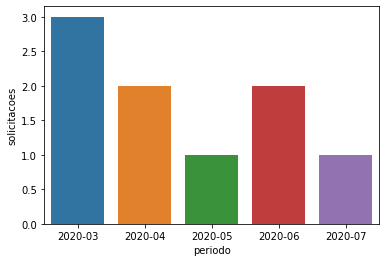

In [879]:
sns.barplot(x = "periodo", y = "solicitacoes", data = res)

## Relatório 2

Objetivo: Obter a quantidade de solicitações atendidas e não atendidas, útil para avaliar a eficácia do programa Auxílio Jurídico.

### Código para obtenção do resultado

In [880]:
res = pd.read_sql_query("""
SELECT
	COUNT(*) AS solicitacoes,
	(
		CASE
			WHEN cpf_profissional IS NOT NULL THEN 'atendidas'
			ELSE 'não atendidas'
		END
	) AS situacao
	FROM solicitacao
	GROUP BY (
		CASE
			WHEN cpf_profissional IS NOT NULL THEN 'atendidas'
			ELSE 'não atendidas'
		END
	)
	ORDER BY 2;
""", conn)

res

,solicitacoes,situacao
0,8,atendidas
1,1,não atendidas


### Gŕafico resultante

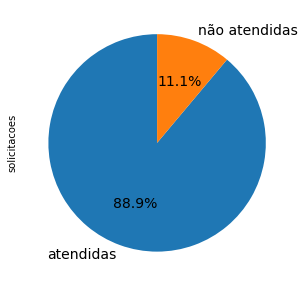

In [881]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
res.plot(kind = "pie", y = "solicitacoes", labels = res["situacao"], ax = ax, autopct = '%1.1f%%', 
 startangle = 90, shadow = False, legend = False, fontsize = 14)

## Relatório 3

Objetivo: Obter o número de solicitações por faixa etária dos auxiliados que as abriram, útil para visualizar qual faixa etária foi mais atingida pela pandemia da COVID-19 quanto à necessidade de auxílio jurídico.

### Código para obtenção do resultado

In [882]:
res = pd.read_sql_query("""
SELECT
	COUNT(*) AS solicitacoes,
	(
		CASE
			WHEN DATE_PART('year', AGE(NOW(), auxiliado.data_nascimento)) <= 22 THEN '0-22'
			WHEN DATE_PART('year', AGE(NOW(), auxiliado.data_nascimento)) <= 29 THEN '23-29'
			ELSE '30+'
		END
	) AS faixa_etaria
	FROM solicitacao
	JOIN auxiliado ON auxiliado.cpf_usuario = solicitacao.cpf_auxiliado
	GROUP BY (
		CASE
			WHEN DATE_PART('year', AGE(NOW(), auxiliado.data_nascimento)) <= 22 THEN '0-22'
			WHEN DATE_PART('year', AGE(NOW(), auxiliado.data_nascimento)) <= 29 THEN '23-29'
			ELSE '30+'
		END
	);
""", conn)

res

,solicitacoes,faixa_etaria
0,5,23-29
1,1,0-22
2,3,30+


### Gráfico resultante

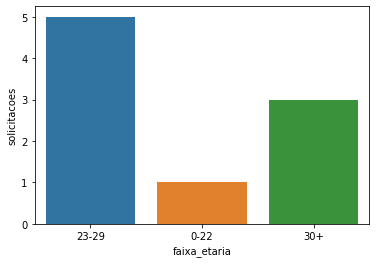

In [883]:
sns.barplot(x = "faixa_etaria", y = "solicitacoes", data = res)

## Relatório 4

Objetivo: Obter o número de usuário cadastrados como auxiliados e o número de usuários cadastrados como profissionais jurídicos, útil para verificar se a oferta e demanda de serviços jurídicos pelo sistema está balanceada.

### Código para obtenção do resultado

In [884]:
res = pd.read_sql_query("""
SELECT COUNT(*) AS quantidade, text 'auxiliados' AS tipo_de_usuario
	FROM auxiliado
UNION ALL
SELECT COUNT(*) AS quantidade, text 'profissionais jurídicos' AS tipo_de_usuario
	FROM profissional_juridico;
""", conn)

res

,quantidade,tipo_de_usuario
0,10,auxiliados
1,7,profissionais jurídicos


### Gráfico resultante

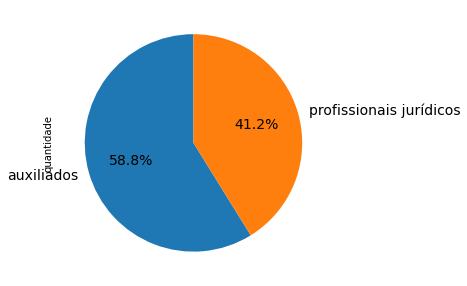

In [885]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
res.plot(kind = "pie", y = "quantidade", labels = res["tipo_de_usuario"], ax = ax, autopct = '%1.1f%%', 
 startangle = 90, shadow = False, legend = False, fontsize = 14)

## Relatório 5

Objetivo: Obter a quantidade de solicitações abertas por região, utilizando o DDD do telefone do auxiliado. Este relatório é útil para verificar qual região foi mais impactada durante a pandemia da COVID-19 com a necessidade de auxílio jurídico.

### Código para obtenção do resultado

In [886]:
res = pd.read_sql_query("""
SELECT COUNT(*) AS solicitacoes, LEFT(auxiliado.numero_telefone::text, 2) AS ddd
	FROM solicitacao
	JOIN auxiliado ON auxiliado.cpf_usuario = solicitacao.cpf_auxiliado
	GROUP BY LEFT(auxiliado.numero_telefone::text, 2);
""", conn)

res

,solicitacoes,ddd
0,2,31
1,2,21
2,2,78
3,3,27


### Gráfico resultante

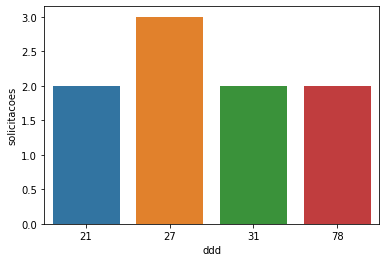

In [887]:
sns.barplot(x = "ddd", y = "solicitacoes", data = res)

# Encerrando conexão

In [888]:
cur.close()
conn.close()